## CMa R1

In [1]:
import aplpy
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


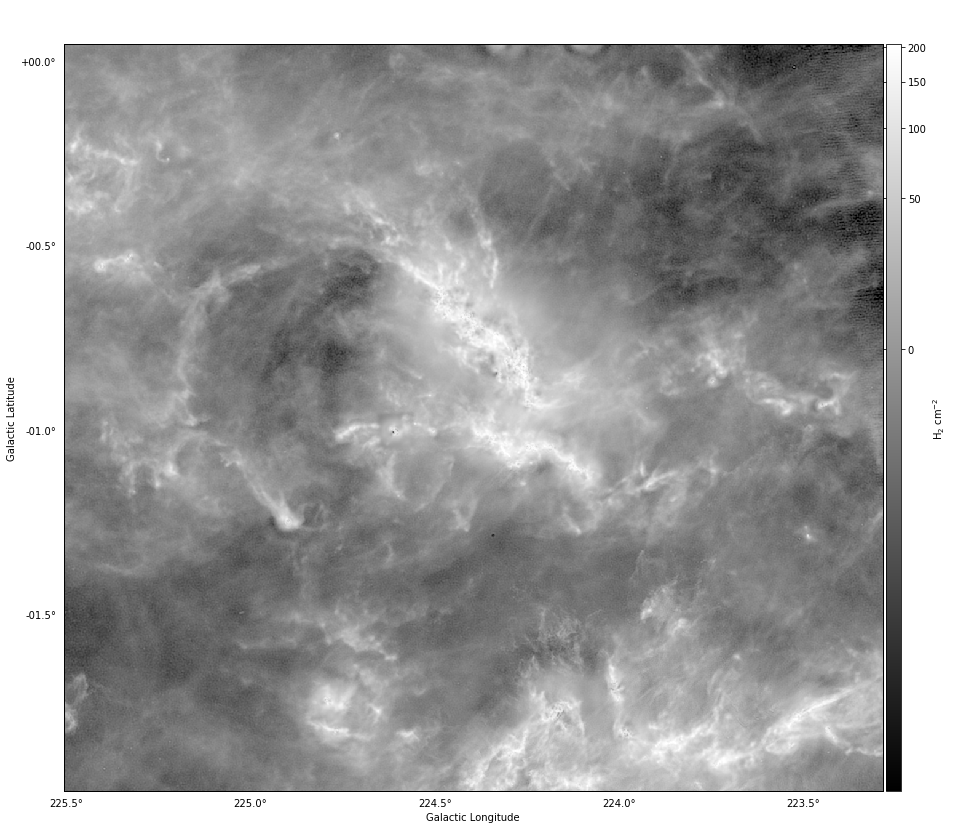

In [2]:
fig_all = plt.figure(1, figsize=(15,15))
figfile = '/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext.fits'
fig = aplpy.FITSFigure(figfile,figure=fig_all, convention='calabretta')
fig.show_colorscale(cmap='gray',stretch='log',vmid=-25,vmin=-24.,vmax=205)
fig.tick_labels.set_xformat('dd.d')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_xspacing(0.5)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

In [12]:
from bokeh.plotting import figure as figbok
from bokeh.io import output_notebook
from bokeh.io import show as showbok
output_notebook()

from astropy import wcs
from powspec import powspec
from wavan import fan_trans, apodize, padding, depad
from gauss_beam import gauss_beam

Loading BokehJS ...

In [13]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

In [42]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

na = im.shape[1]
nb = im.shape[0]
imzm = im - np.mean(im)

#Apodization

tapper = apodize(nb,na,0.98)
imt = imzm *tapper
imr = padding(imt,1500,1500)

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

#Beam Power spectrum
FWHM = 12. / (60.*reso)  #Beam size Ken Marsh maps
#beam = gauss_beam(FWHM,im.shape[0],im.shape[1],FWHM=True)
beam = gauss_beam(FWHM,1500,1500,FWHM=True)
tab_k, spec_beam = powspec(beam, reso=reso)
spec_beamn = spec_beam/spec_beam[0]  #Spectrum normalisation
#Bwt, BS11a, Bwav_k, BS1a, Bq = fan_trans(beam, reso=reso, q=0, qdyn=False)
#del Bwt,BS11a,Bq
#BS1an = BS1a / BS1a[3]

#Plot Fourier power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [arcmin^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools, plot_width=800, plot_height=800)
f.line(tab_k, spec_k, legend='Fourier')
f.line(tab_k, spec_k/spec_beamn, color='blue', legend='Beam corrected')

#Set a list of q
q=[]
q[0:4]=[1.8]*5
q[5:25]=[2.1]*20
#q=[2.1]*25
print q

#Wavelet power spectrum
#wt, S11a, wav_k, S1a, q = fan_trans(imzm, reso=reso, q=q, qdyn=True)
wt, S11a, wav_k, S1a, q = fan_trans(imzm, reso=reso, q=q, qdyn=False, apodize= 0.98, arrdim = np.array([1500,1500]))

S1an = np.copy(S1a)

S1an[0,3:] = S1a[0,3:]/BS1an[3:]
S1an[1,3:] = S1a[1,3:]/BS1an[3:]
S1an[2,3:] = S1a[2,3:]/BS1an[3:]

f.diamond(wav_k, S1an[0,:], legend='Wavelet',color='black',line_width=5)
f.triangle(wav_k, S1an[1,:], legend='Coherent',color='blue',line_width=5)
f.square(wav_k, S1an[2,:], legend='Gaussian',color='red',line_width=5)

#Power law fit
coef = np.polyfit(np.log(wav_k[7:16]),np.log(S1an[2,7:16]),deg=1)
yfit = np.exp(coef[1])*wav_k**coef[0]

coef2 = np.polyfit(np.log(wav_k[11:18]),np.log(S1an[1,11:18]),deg=1)
yfit2 = np.exp(coef2[1])*wav_k**coef2[0]

print "Power law = ", coef[0],coef2[0]

f.line(wav_k, yfit, legend='Fit', line_dash='dashed')
f.line(wav_k, yfit2, line_dash='dashed')

showbok(f)

[1.8, 1.8, 1.8, 1.8, 1.8, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1]
Power law =  -3.81444790701 -2.69514554017


In [24]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

na = im.shape[1]
nb = im.shape[0]
imzm = im - np.mean(im)

#Apodization

tapper = apodize(nb,na,0.98)
imt = imzm *tapper
imr = padding(imt,1500,1500)

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

#Beam Power spectrum
FWHM = 12. / (60.*reso)  #Beam size Ken Marsh maps
#beam = gauss_beam(FWHM,im.shape[0],im.shape[1],FWHM=True)
beam = gauss_beam(FWHM,1500,1500,FWHM=True)
tab_k, spec_beam = powspec(beam, reso=reso)
spec_beamn = spec_beam/spec_beam[0]  #Spectrum normalisation
#Bwt, BS11a, Bwav_k, BS1a, Bq = fan_trans(beam, reso=reso, q=0, qdyn=False)
#del Bwt,BS11a,Bq
BS1an = BS1a / BS1a[3]

#Plot Fourier power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [arcmin^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools, plot_width=800, plot_height=800)
f.line(tab_k, spec_k, legend='Fourier')
f.line(tab_k, spec_k/spec_beamn, color='blue', legend='Beam corrected')

#Set a list of q
#q=[]
#q[0:4]=[1.4]*5
#q[5:25]=[2.5]*20
q=[2.1]*25
#print q

#Wavelet power spectrum
#wt, S11a, wav_k, S1a, q = fan_trans(imzm, reso=reso, q=q, qdyn=True)
wt, S11a, wav_k, S1a, q = fan_trans(imzm, reso=reso, q=q, qdyn=False, apodize= 0.98, arrdim = np.array([1500,1500]))

S1an = np.copy(S1a)

S1an[0,3:] = S1a[0,3:]/BS1an[3:]
S1an[1,3:] = S1a[1,3:]/BS1an[3:]
S1an[2,3:] = S1a[2,3:]/BS1an[3:]

f.diamond(wav_k, S1an[0,:], legend='Wavelet',color='black',line_width=5)
f.triangle(wav_k, S1an[1,:], legend='Coherent',color='blue',line_width=5)
f.square(wav_k, S1an[2,:], legend='Gaussian',color='red',line_width=5)

#Power law fit
coef = np.polyfit(np.log(wav_k[5:16]),np.log(S1an[2,5:16]),deg=1)
yfit = np.exp(coef[1])*wav_k**coef[0]

coef2 = np.polyfit(np.log(wav_k[11:19]),np.log(S1an[1,11:19]),deg=1)
yfit2 = np.exp(coef2[1])*wav_k**coef2[0]

print "Power law = ", coef[0],coef2[0]

f.line(wav_k, yfit, legend='Fit', line_dash='dashed')
f.line(wav_k, yfit2, line_dash='dashed')

showbok(f)

Power law =  -3.64381909478 -2.71238413788


In [21]:
#Plot Beam power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [arcmin^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools)
f.line(tab_k, spec_beamn, legend='Fourier')
f.diamond(Bwav_k, BS1an, legend='Wavelet',color='black',line_width=5)
showbok(f)

[1.4, 1.4, 1.4, 1.4, 1.4, 2.0999999999999996, 1.9999999999999996, 2.0999999999999996, 2.0999999999999996, 2.1999999999999997, 2.0999999999999996, 2.0999999999999996, 2.0999999999999996, 2.0999999999999996, 2.0999999999999996, 2.1999999999999997, 2.0999999999999996, 2.1999999999999997, 2.1999999999999997, 2.1999999999999997, 2.3, 2.3, 2.3, 2.3, 2.3]
wav_k.shape[0]= 25


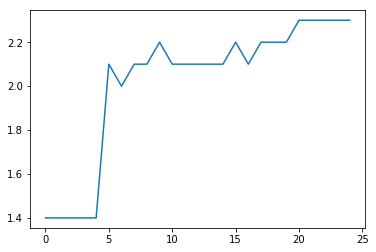

In [37]:
print q
print 'wav_k.shape[0]=',wav_k.shape[0]

x = range(25)
plot(x,np.array(q).reshape(25))

In [19]:
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_Bwav_k.npy',Bwav_k)
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_BS1a.npy',BS1a)
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_wt.npy',wt)
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_S11a.npy',S11a)
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_wav_k.npy',wav_k)
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_S1a.npy',S1a)
np.save('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_q.npy',q)

In [10]:
Bwav_k = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_Bwav_k.npy')
BS1a = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_BS1a.npy')
wt = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_wt.npy')
S11a = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_S11a.npy')
wav_k = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_wav_k.npy')
S1a = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_S1a.npy')
q = np.load('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_q.npy')

INFO: Auto-setting vmin to -4.497e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.356e+01 [aplpy.core]
INFO: Auto-setting vmin to -6.050e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.770e+02 [aplpy.core]


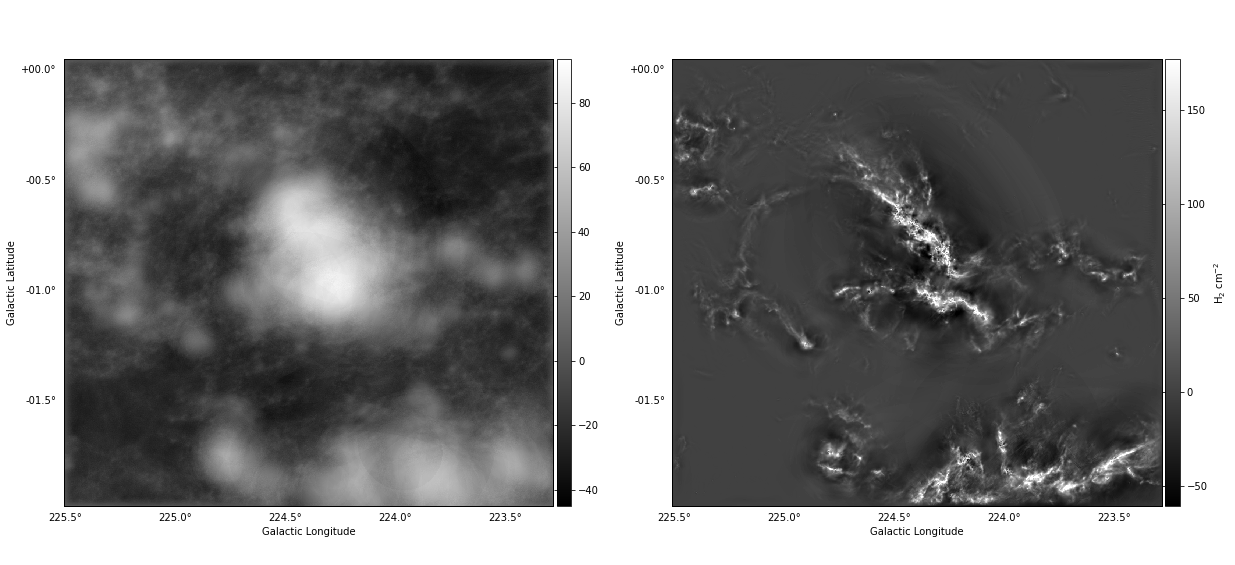

In [43]:
M = wav_k.shape[0]

coherent = np.sum(wt[M:2*M,:,:],axis=0) + np.mean(im)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) + np.mean(im)

fits.writeto('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_cohe.fits',\
            coherent.real,header,overwrite=True)
fits.writeto('/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_gaussian.fits',\
            Gaussian.real,header,overwrite=True)

fig_all = plt.figure(1, figsize=(20,10))

figfile = '/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_gaussian.fits'
fig = aplpy.FITSFigure(figfile, figure=fig_all, convention='calabretta',subplot=(1, 2, 1))
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_xformat('dd.d')
fig.tick_labels.set_yformat('dd.d')
fig.add_colorbar()

figfile = '/user/workdir/robitaij/fil2star/Herschel/Ken_Marsh/analysis/CMa_R1_scr_ext_cohe.fits'
fig = aplpy.FITSFigure(figfile, figure=fig_all, convention='calabretta',subplot=(1, 2, 2))
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_xformat('dd.d')
fig.tick_labels.set_yformat('dd.d')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

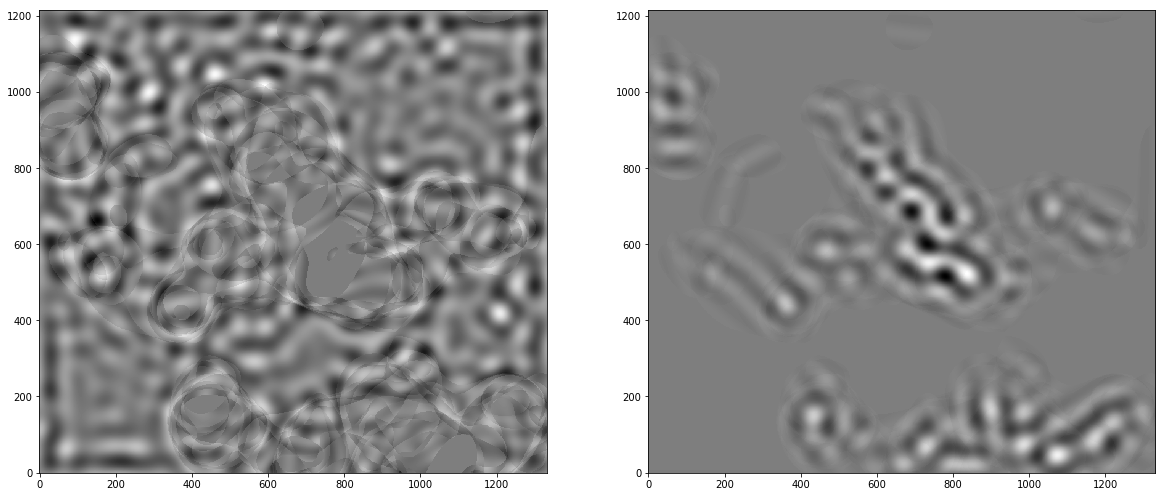

In [50]:
scale = 10
fig_all = plt.figure(1, figsize=(20,10))
plt.subplot(1,2,1)
imshow(wt[2*M+scale,:,:].real,origin='below',cmap='gray')
plt.subplot(1,2,2)
imshow(wt[M+scale,:,:].real,origin='below',cmap='gray')

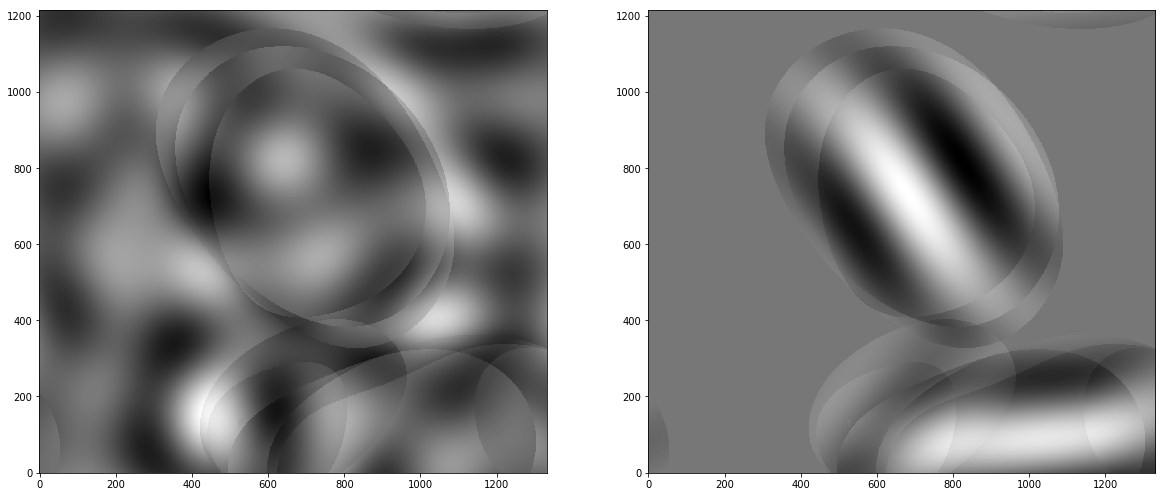

In [46]:
scale = 5
fig_all = plt.figure(1, figsize=(20,10))
plt.subplot(1,2,1)
imshow(wt[2*M+scale,:,:].real,origin='below',cmap='gray')
plt.subplot(1,2,2)
imshow(wt[M+scale,:,:].real,origin='below',cmap='gray')

/nix/store/dd15pfxca5yjdww53b4b7zfcf6k67pfa-python-2.7.13-env/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


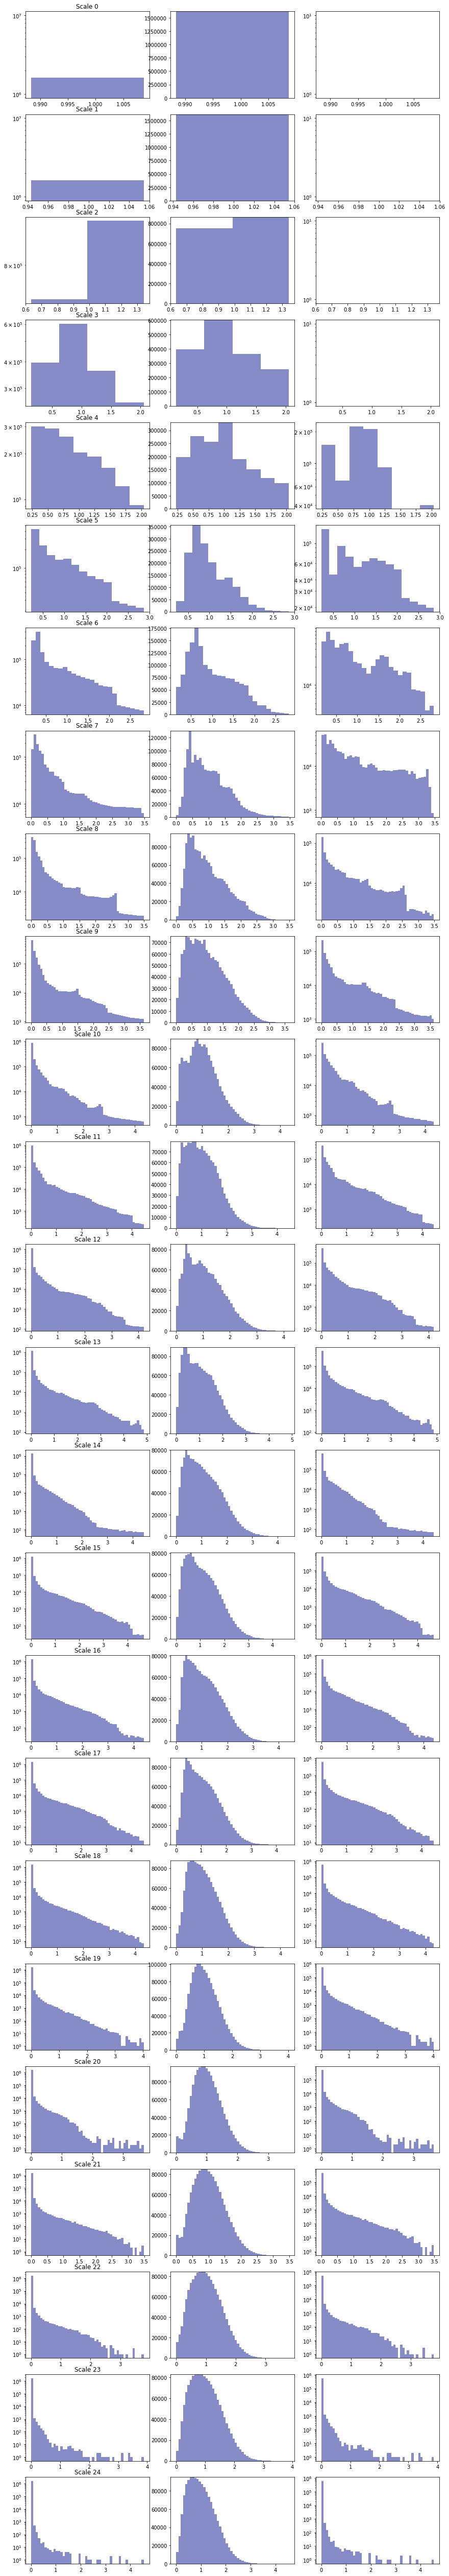

In [48]:
fig, axs = plt.subplots(M,3,figsize=(12,70))

axs = axs.ravel()
fig.tight_layout()

for i in range(M):
    
    if np.mean(S11a[M+i,:,:]) !=0:
        wc = (S11a[M+i,:,:])/np.mean(S11a[M+i,:,:])
    else:
        wc = np.zeros((im.shape[0],im.shape[1]))
    wo = (S11a[i,:,:])/np.mean(S11a[i,:,:])
    #wg = (S11a[2*M+i,0:100 & 700:,:])/np.mean(S11a[2*M+i,:,:])
    #wg = (S11a[2*M+i,100:700,:])/np.mean(S11a[2*M+i,:,:])
    wg = (S11a[2*M+i,:,:])/np.mean(S11a[2*M+i,:,:])
    
    #Number of independent points
    npix = np.int((im.shape[0] * wav_k[i]*reso)**2.)
    if npix == 0: nbins=1
    if npix > 0 & npix < 50 : nbins=npix
    if npix > 50 : nbins=50
    
    histo, edges = np.histogram(wo,bins=nbins)
    histo_c, edges = np.histogram(wc[wc != 0.],bins=nbins)
    histo_g, edges = np.histogram(wg[wg != 0.],bins=nbins)
    
    axs[i*3].bar(edges[:-1], histo, width=np.diff(edges), align="edge",edgecolor='none',facecolor='#858bc7')
    axs[i*3].set_title('Scale '+np.str(i))
    axs[i*3].set_yscale('log')
    
    axs[i*3+1].bar(edges[:-1], histo_g, width=np.diff(edges), align="edge",edgecolor='none',facecolor='#858bc7')
    axs[i*3+1].set_ylim((0,np.max(histo_g)))
    
    axs[i*3+2].bar(edges[:-1], histo_c, width=np.diff(edges), align="edge",edgecolor='none',facecolor='#858bc7')
    axs[i*3+2].set_yscale('log')

-0.000334197396863
